## Importando dependências e dados

In [25]:
# importando dados do tensorflow
%pip install tensorflow tensorflow-gpu matplotlib 
%pip install tensorflow-datasets


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Inteli\\AppData\\Local\\Temp\\pip-install-z4qi6sz6\\tensorflow-gpu_f0216b95a3f64efaa415b3cbcf8c4e24\\setup.py'"'"'; __file__='"'"'C:\\Users\\Inteli\\AppData\\Local\\Temp\\pip-install-z4qi6sz6\\tensorflow-gpu_f0216b95a3f64efaa415b3cbcf8c4e24\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Inteli\AppData\Local\Temp\pip-wheel-3c1p8hmr'
       cwd: C:\Users\Inteli\AppData\Local\Temp\pip-install-z4qi6sz6\tensorflow-gpu_f0216b95a3f64efaa415b3cbcf8c4e24\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", l

You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
# lista de pacotes instalados
%pip list

Package                      Version
---------------------------- ---------------------
absl-py                      1.4.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
click                        8.1.7
cloudpickle                  2.2.1
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.0
cycler                       0.11.0
dacite                       1.8.1
DateTime                  

You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### gpu do tensorflow

In [27]:
# importando pacotes
import tensorflow as tf

# configurar crescimento dinamico da memoria da GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

#### pacotes usados no projeto

In [28]:
# importando pacotes
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd


#### carregando dados

In [29]:
# carregando dados do tensorflow - fashion mnist
# transformando dados em dataframe
df = tfds.load('fashion_mnist', split='train')

In [30]:
df.as_numpy_iterator().next()['label']

2

## Visualizando Dataset

In [31]:
import numpy as np

In [32]:
dataiter = df.as_numpy_iterator()

#### Criando alguns plots

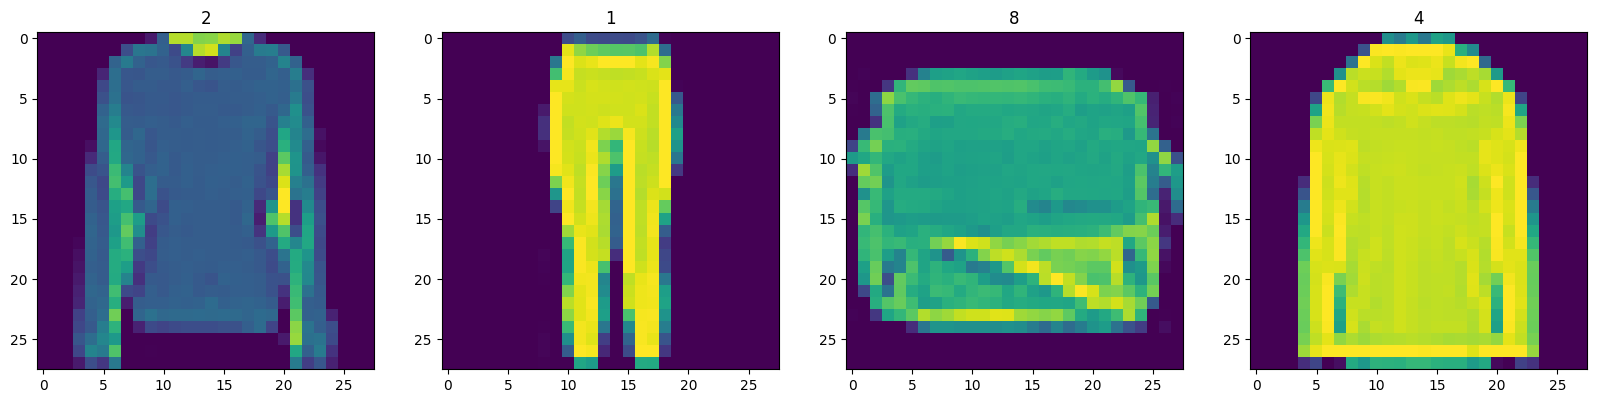

In [33]:
# setando o formato do plot
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# plotando quatros imagens
for idx in range(4):
    # carregando dados
    batch = dataiter.next()
    # plotando imagem -> squeeze remove a dimensão 1
    ax[idx].imshow(np.squeeze(batch['image']))
    # setando titulo -> rotulo
    ax[idx].set_title(batch['label'])

In [34]:
def scale_images(data):
    # Extrai a imagem do dicionário de dados
    image = data['image']
    
    # Normaliza os valores de pixel dividindo por 255
    # Isso é feito para trazer os valores para o intervalo [0, 1]
    return image / 255


In [35]:
# Aplica a função scale_images a cada elemento do DataFrame df
df = df.map(scale_images)

# Embaralha os dados no DataFrame df usando um buffer de tamanho 60000
df = df.shuffle(60000)

# Faz cache dos dados do DataFrame df para melhorar o desempenho ao acessá-los repetidamente
df = df.cache()

# Agrupa os dados do DataFrame df em lotes de tamanho 128
df = df.batch(128)

# Pré-carrega 64 lotes de dados do DataFrame df para acelerar o carregamento de dados durante o treinamento
df = df.prefetch(64)


In [39]:
# Converte o DataFrame df em um iterador numpy usando o método as_numpy_iterator()
# Isso permite iterar sobre os elementos do DataFrame como arrays numpy
df.as_numpy_iterator().next().shape

# A função .next() é usada para obter o próximo elemento do iterador
# Isso é típico em Python 2.x, em Python 3.x usamos next(df.as_numpy_iterator())
# Neste contexto, estamos obtendo o próximo elemento do iterador numpy
# que representa uma instância de dados do DataFrame

# A função .shape é utilizada para acessar a forma do elemento numpy
# Isso retorna as dimensões do array numpy, indicando sua estrutura
# Por exemplo, para uma matriz, a forma seria (linhas, colunas)
# Neste caso, a forma é (128, 28, 28, 1), indicando que temos 128 imagens de 28x28 pixels em escala de cinza


(128, 28, 28, 1)